In [1]:
from MSSD import MSSD
import math
import numpy as np
from alive_progress import alive_bar
import matplotlib.pyplot as plt
%matplotlib inline
import time


In [2]:
def sphere_point(theta, phi):
    return [math.sin(phi)*math.cos(theta), math.sin(phi)*math.sin(theta), -math.cos(phi)]

def great_circle_with_time(theta, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

l = 300
traj1 = great_circle_with_time(2*math.pi*0.1, length=l, time_i=0, time_f=l)
traj2 = great_circle_with_time(2*math.pi*0.6, length=l, time_i=0, time_f=l)

In [3]:
dist_mat = np.zeros((len(traj1), len(traj2)))
eps = 1.976

with alive_bar(len(traj1)*len(traj2), force_tty=True) as bar:
    for i in range(len(traj1)):
        for j in range(len(traj2)):
            dist_mat[i,j] = round(np.linalg.norm(traj1[i][1:]-traj2[j][1:]), 3)
            bar()

print(dist_mat)
print((dist_mat < eps)*np.ones((len(traj1), len(traj2))))
#plt.matshow((dist_mat < eps))

|████████████████████████████████████████| 90000/90000 [100%] in 4.7s (190627415/90000 [30%] in 1s (187 79716/90000 [89%] in 4s (191
[[0.    0.01  0.021 ... 2.    2.    2.   ]
 [0.01  0.021 0.031 ... 2.    2.    2.   ]
 [0.021 0.031 0.042 ... 2.    2.    2.   ]
 ...
 [2.    2.    2.    ... 0.063 0.052 0.042]
 [2.    2.    2.    ... 0.052 0.042 0.031]
 [2.    2.    2.    ... 0.042 0.031 0.021]]
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [4]:
mssd1 = MSSD()
mssd1.string_struct = 'dict'
mssd1._profiling = True
start = time.process_time()
mssd1.set_trajectories(traj1, traj2)
print('Preprocessing time taken using dict structure: ' + str(time.process_time() - start))
start = time.process_time()
mssd1.compute_filt()
print('Total time taken using dict structure: ' + str(time.process_time() - start))
mssd1.t_thresh_metric(7)

mssd2 = MSSD()
mssd2.string_struct = 'matrix'
mssd2._profiling = True
start = time.process_time()
mssd2.set_trajectories(traj1, traj2)
print('Preprocessing time taken using matrix structure: ' + str(time.process_time() - start))
start = time.process_time()
mssd2.compute_filt()
print('Total time taken using matrix structure: ' + str(time.process_time() - start))
mssd2.t_thresh_metric(7)

#Detailed time profiler results with dict:
#length - preprocessing time - sorting time - main iteration time - post processing time - total time
#300 - 0.000 - 0.008 - 0.67 - 0.045 - 4.07
#600 - 0.000 - 0.056 - 3.3 - 0.16 - 18.16
#2000 - 0.000 - 0.74 - 46.22 - 2.3 - 207

#Detailed time profiler results with dict:
#length - preprocessing time - sorting time - main iteration time - post processing time - total time
#300 - 0.001 - 0.012 - 1.12 - 0.041 - 4.71
#600 - 0.004 - 0.039 - 5.9 - 0.39 - 19.04
#2000 - 0.029 - 0.54 - 69.19 - 2.75 - 245.44

#Seems to indicate quadratic time complexity, and that dict better than matrix 

Preprocessing time taken using dict structure: 0.0001877410000004076
Time taken in Sorting stage: 0.00882381399999943
Time taken in Main iteration stage with dict data structure: 0.7291853329999984
Time taken in Post processing stage: 0.04109833900000126
Total time taken using dict structure: 3.9376621059999994
Preprocessing time taken using matrix structure: 0.0014083039999999158
Time taken in Sorting stage: 0.012138714999998967
Time taken in Main iteration stage with matrix data structure: 1.192168006000001
Time taken in Post processing stage: 0.04918706299999975
Total time taken using matrix structure: 4.561478102000001


0.126

[0.    0.021 0.042 0.063 0.084 0.105 0.126 0.146 0.167 0.188 0.209 0.23
 0.251 0.271 0.292 0.313 0.334 0.354 0.375 0.395 0.416 0.436 0.457 0.477
 0.497 0.518 0.538 0.558 0.578 0.598 0.618 0.638 0.658 0.677 0.697 0.717
 0.736 0.756 0.775 0.794 0.813 0.833 0.852 0.87  0.889 0.908 0.927 0.945
 0.964 0.982 1.    1.018 1.036 1.054 1.072 1.089 1.107 1.124 1.141 1.159
 1.176 1.192 1.209 1.226 1.242 1.259 1.275 1.291 1.307 1.323 1.338 1.354
 1.369 1.384 1.399 1.414 1.429 1.444 1.458 1.472 1.486 1.5   1.514 1.528
 1.541 1.554 1.567 1.58  1.593 1.606 1.618 1.63  1.642 1.654 1.666 1.677
 1.689 1.7   1.711 1.721 1.732 1.742 1.753 1.763 1.772 1.782 1.791 1.801
 1.81  1.818 1.827 1.836 1.844 1.852 1.86  1.867 1.875 1.882 1.889 1.896
 1.902 1.908 1.915 1.921 1.926 1.932 1.937 1.942 1.947 1.952 1.956 1.961
 1.965 1.968 1.972 1.975 1.979 1.981 1.984 1.987 1.989 1.991 1.993 1.995
 1.996 1.997 1.998 1.999 2.    2.    2.    2.    2.    2.    2.    2.
 2.    2.    2.    2.    2.    2.    2.    2.    2.    

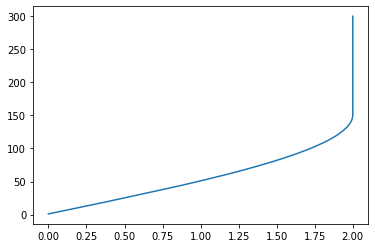

[0.    0.021 0.042 0.063 0.084 0.105 0.126 0.146 0.167 0.188 0.209 0.23
 0.251 0.271 0.292 0.313 0.334 0.354 0.375 0.395 0.416 0.436 0.457 0.477
 0.497 0.518 0.538 0.558 0.578 0.598 0.618 0.638 0.658 0.677 0.697 0.717
 0.736 0.756 0.775 0.794 0.813 0.833 0.852 0.87  0.889 0.908 0.927 0.945
 0.964 0.982 1.    1.018 1.036 1.054 1.072 1.089 1.107 1.124 1.141 1.159
 1.176 1.192 1.209 1.226 1.242 1.259 1.275 1.291 1.307 1.323 1.338 1.354
 1.369 1.384 1.399 1.414 1.429 1.444 1.458 1.472 1.486 1.5   1.514 1.528
 1.541 1.554 1.567 1.58  1.593 1.606 1.618 1.63  1.642 1.654 1.666 1.677
 1.689 1.7   1.711 1.721 1.732 1.742 1.753 1.763 1.772 1.782 1.791 1.801
 1.81  1.818 1.827 1.836 1.844 1.852 1.86  1.867 1.875 1.882 1.889 1.896
 1.902 1.908 1.915 1.921 1.926 1.932 1.937 1.942 1.947 1.952 1.956 1.961
 1.965 1.968 1.972 1.975 1.979 1.981 1.984 1.987 1.989 1.991 1.993 1.995
 1.996 1.997 1.998 1.999 2.    2.    2.    2.    2.    2.    2.    2.
 2.    2.    2.    2.    2.    2.    2.    2.    2.    

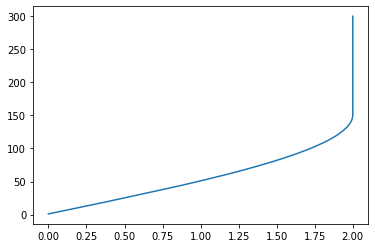

True


In [5]:
print(mssd1.filt)

x = [i+1 for i in range(mssd1.filt.shape[0])]
y = [mssd1.filt[i] for i in range(mssd1.filt.shape[0])]

plt.plot(y,x)
plt.show()

print(mssd2.filt)

x = [i+1 for i in range(mssd2.filt.shape[0])]
y = [mssd2.filt[i] for i in range(mssd2.filt.shape[0])]

plt.plot(y,x)
plt.show()

print(np.array_equal(mssd1.filt, mssd2.filt))